In the name of Allah

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip 'drive/MyDrive/Courses/AISC/Brain_Tumor'

In [84]:
TRAIN_DIR = 'Training'
TEST_DIR = 'Testing'
N_SMP = 395
IMG_SIZE = 64, 64
N_CLASSES = 4

In [21]:
img_test = TRAIN_DIR + '/glioma_tumor/gg (1).jpg'

In [6]:
import cv2
import matplotlib.pyplot as plt

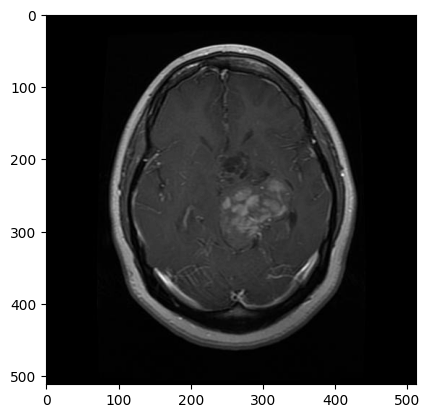

In [22]:
plt.imshow(cv2.imread(img_test, 0), cmap='gray')

In [38]:
name_to_index = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [55]:
import os
import numpy as np

In [87]:
def get_xy(data_dir, n_smp=None):
  x = []
  y = []
  for folder in os.listdir(data_dir):
    print(folder)
    if n_smp:
      y.extend([name_to_index[folder]] * n_smp)
    else:
      y.extend([name_to_index[folder]] * len(os.listdir(os.path.join(data_dir, folder))))
    for i, file in enumerate(os.listdir(os.path.join(data_dir, folder))):
      if n_smp and i == n_smp:
        break
      img = cv2.imread(os.path.join(data_dir, folder, file), 0)
      x.append(np.expand_dims(cv2.resize(img, IMG_SIZE), 2))
  x = np.array(x) / 255.
  y = np.array(y)
  return x, y

**With balancing**

In [63]:
x, y = get_xy(TRAIN_DIR, N_SMP)

no_tumor
pituitary_tumor
glioma_tumor
meningioma_tumor


In [65]:
x.shape, y.shape

((1580, 64, 64, 1), (1580,))

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8)

In [67]:
print(y_val)

[1 1 0 0 3 2 1 2 0 1 2 1 0 2 2 3 0 3 1 0 3 2 1 1 3 3 1 2 1 2 0 1 1 3 0 3 0
 0 2 0 3 0 3 2 1 2 3 3 3 3 0 2 2 1 1 2 1 1 0 3 3 3 1 3 0 2 3 3 3 0 2 2 0 0
 0 0 2 1 1 1 1 0 2 1 1 2 0 1 0 2 2 1 0 3 3 1 1 2 0 2 0 0 0 0 1 2 0 2 3 0 2
 0 3 0 2 0 2 3 3 3 2 2 3 3 3 1 0 0 2 3 3 0 1 1 0 1 0 1 0 2 2 3 0 1 1 3 0 3
 1 1 3 0 1 1 0 2 0 1 2 0 2 3 3 2 3 2 1 3 0 2 0 3 3 2 1 0 3 1 3 3 1 0 2 1 3
 2 0 1 1 1 2 1 0 2 1 0 0 2 3 3 1 0 3 1 1 3 0 2 0 0 2 0 3 0 3 2 3 2 0 1 3 3
 2 0 2 0 0 0 1 0 2 2 0 2 1 0 0 2 3 2 2 2 0 2 0 3 3 1 0 0 1 1 3 0 1 0 0 3 3
 3 1 2 0 2 3 2 2 3 1 2 3 1 1 1 2 1 2 1 1 1 0 2 3 0 2 2 2 3 2 0 3 2 2 0 2 1
 2 2 3 0 0 1 2 2 2 0 0 1 3 2 0 3 0 1 1 2]


In [73]:
from keras.utils import to_categorical

In [76]:
y_train_ctg = to_categorical(y_train)
y_val_ctg = to_categorical(y_val)

In [78]:
y_val_ctg

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [101]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same', input_shape=x_train.shape[1:]))

model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=N_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 64)        

In [71]:
from keras.callbacks import EarlyStopping

In [102]:
results = model.fit(x_train, y_train_ctg, epochs=50, validation_data=(x_val, y_val_ctg),
          callbacks=EarlyStopping(patience=5, restore_best_weights=True, verbose=1))

Epoch 1/50
40/40 [==============================] - 12s 238ms/step - loss: 1.1700 - accuracy: 0.4684 - val_loss: 0.8982 - val_accuracy: 0.6551
Epoch 2/50
40/40 [==============================] - 8s 190ms/step - loss: 0.8344 - accuracy: 0.6598 - val_loss: 0.8093 - val_accuracy: 0.6361
Epoch 3/50
40/40 [==============================] - 8s 207ms/step - loss: 0.6867 - accuracy: 0.7128 - val_loss: 0.6606 - val_accuracy: 0.7722
Epoch 4/50
40/40 [==============================] - 9s 224ms/step - loss: 0.5848 - accuracy: 0.7611 - val_loss: 0.6747 - val_accuracy: 0.7848
Epoch 5/50
40/40 [==============================] - 7s 184ms/step - loss: 0.5470 - accuracy: 0.7761 - val_loss: 0.7166 - val_accuracy: 0.6899
Epoch 6/50
40/40 [==============================] - 9s 230ms/step - loss: 0.4394 - accuracy: 0.8315 - val_loss: 0.5713 - val_accuracy: 0.8101
Epoch 7/50
40/40 [==============================] - 7s 175ms/step - loss: 0.3887 - accuracy: 0.8521 - val_loss: 0.5229 - val_accuracy: 0.8101
Epoch

In [88]:
x_test, y_test = get_xy(TEST_DIR)

no_tumor
pituitary_tumor
glioma_tumor
meningioma_tumor


In [89]:
x_test.shape, y_test.shape

((394, 64, 64, 1), (394,))

In [103]:
y_test_ctg = to_categorical(y_test)

In [104]:
yhat_train_ctg = model.predict(x_train).round()
yhat_val_ctg = model.predict(x_val).round()
yhat_test_ctg = model.predict(x_test).round()

yhat_train = yhat_train_ctg.argmax(axis=1)
yhat_val = yhat_val_ctg.argmax(axis=1)
yhat_test = yhat_test_ctg.argmax(axis=1)

13/13 [==============================] - 1s 77ms/step


In [94]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

In [106]:
print(cr(y_train_ctg, yhat_train_ctg))
print(cr(y_val, yhat_val))
print(cr(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       308
           1       0.81      0.87      0.84       320
           2       0.96      0.88      0.92       313
           3       0.98      0.98      0.98       323

   micro avg       0.92      0.90      0.91      1264
   macro avg       0.92      0.90      0.91      1264
weighted avg       0.92      0.90      0.91      1264
 samples avg       0.90      0.90      0.90      1264

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        87
           1       0.66      0.76      0.70        75
           2       0.89      0.76      0.82        82
           3       0.90      0.88      0.89        72

    accuracy                           0.81       316
   macro avg       0.82      0.81      0.81       316
weighted avg       0.82      0.81      0.81       316

              precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
print(cm(y_train, yhat_train))
print(cm(y_val, yhat_val))
print(cm(y_test, yhat_test))

[[273  35   0   0]
 [ 23 277  12   8]
 [  8  28 277   0]
 [  4   0   1 318]]
[[73 10  0  4]
 [ 9 57  7  2]
 [ 1 18 62  1]
 [ 6  2  1 63]]
[[14 38 41  7]
 [ 5 65 39  6]
 [ 2 13 90  0]
 [11 31  4 28]]


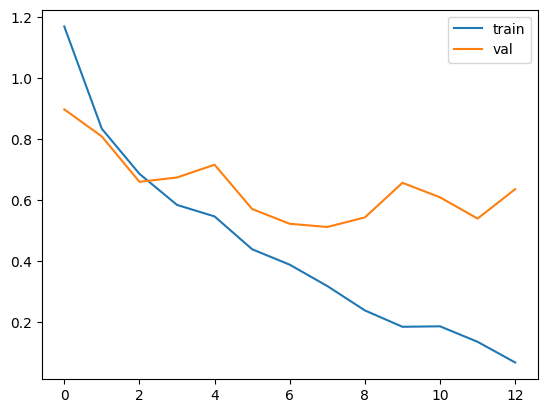

In [109]:
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='val')
plt.legend()

**Without balancing**

In [110]:
x, y = get_xy(TRAIN_DIR)

no_tumor
pituitary_tumor
glioma_tumor
meningioma_tumor


In [111]:
x.shape, y.shape

((2870, 64, 64, 1), (2870,))

In [112]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8)

In [113]:
print(y_val)

[1 0 3 0 3 2 3 0 0 1 1 2 0 3 3 1 0 1 1 1 3 3 1 2 3 1 1 1 3 3 0 0 0 3 1 1 3
 1 3 0 3 1 1 1 3 1 3 0 2 2 1 2 1 0 0 3 1 2 1 3 0 0 0 3 3 0 1 1 3 1 1 0 0 0
 0 3 2 3 3 1 0 2 1 3 1 1 2 2 1 3 1 2 1 3 1 1 3 1 0 3 0 1 2 2 3 0 3 3 1 1 2
 0 2 0 1 0 3 0 0 0 0 1 3 3 1 0 2 2 2 3 2 2 0 1 3 1 1 2 1 0 3 3 0 0 3 2 1 3
 1 0 1 0 0 0 1 1 3 3 3 3 3 1 3 1 2 2 1 3 3 2 1 0 3 3 0 0 3 1 1 0 0 2 0 3 1
 3 0 1 0 1 3 1 0 3 0 0 3 3 1 0 2 2 1 3 3 0 0 0 3 3 0 1 1 2 1 3 0 0 2 0 1 2
 0 2 0 0 3 2 0 3 1 0 2 1 2 2 1 0 3 1 1 0 3 0 3 1 3 2 0 0 0 0 3 1 3 1 0 0 1
 3 1 2 1 1 3 2 3 2 3 1 2 2 0 1 3 2 3 1 2 0 1 3 2 3 2 0 3 1 2 3 2 1 3 3 0 1
 0 0 2 3 2 0 0 3 0 1 2 1 1 0 3 0 0 0 1 3 0 3 0 1 1 0 1 2 0 3 1 0 3 0 1 3 0
 3 1 3 3 1 2 3 3 1 2 1 1 0 1 1 1 1 3 0 3 0 2 0 2 3 2 3 3 3 1 0 3 0 1 1 3 2
 0 1 0 1 0 0 0 0 3 0 1 0 0 2 0 0 1 1 1 3 0 3 0 3 3 2 1 2 0 0 1 3 3 3 1 0 1
 0 3 3 0 3 1 3 3 2 1 1 3 1 0 2 1 3 0 2 2 0 1 0 0 1 0 1 0 2 2 1 3 2 0 1 0 3
 1 1 0 0 2 2 2 1 0 3 0 3 1 2 3 0 3 0 1 0 0 1 3 1 1 2 3 3 3 0 2 3 1 0 1 1 1
 3 1 2 1 3 2 1 1 3 1 1 2 

In [114]:
y_train_ctg = to_categorical(y_train)
y_val_ctg = to_categorical(y_val)

In [115]:
y_val_ctg

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [116]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same', input_shape=x_train.shape[1:]))

model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=N_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 64)        

In [117]:
results = model.fit(x_train, y_train_ctg, epochs=50, validation_data=(x_val, y_val_ctg),
          callbacks=EarlyStopping(patience=5, restore_best_weights=True, verbose=1))

Epoch 1/50
72/72 [==============================] - 19s 233ms/step - loss: 1.0924 - accuracy: 0.5105 - val_loss: 0.8284 - val_accuracy: 0.6411
Epoch 2/50
72/72 [==============================] - 16s 218ms/step - loss: 0.7780 - accuracy: 0.6585 - val_loss: 0.6612 - val_accuracy: 0.7230
Epoch 3/50
72/72 [==============================] - 22s 301ms/step - loss: 0.6082 - accuracy: 0.7361 - val_loss: 0.5743 - val_accuracy: 0.7422
Epoch 4/50
72/72 [==============================] - 17s 241ms/step - loss: 0.4828 - accuracy: 0.8018 - val_loss: 0.4575 - val_accuracy: 0.8066
Epoch 5/50
72/72 [==============================] - 15s 208ms/step - loss: 0.3966 - accuracy: 0.8463 - val_loss: 0.4419 - val_accuracy: 0.8014
Epoch 6/50
72/72 [==============================] - 15s 207ms/step - loss: 0.2981 - accuracy: 0.8868 - val_loss: 0.3104 - val_accuracy: 0.8850
Epoch 7/50
72/72 [==============================] - 15s 204ms/step - loss: 0.2460 - accuracy: 0.9042 - val_loss: 0.4731 - val_accuracy: 0.8293

In [118]:
yhat_train_ctg = model.predict(x_train).round()
yhat_val_ctg = model.predict(x_val).round()
yhat_test_ctg = model.predict(x_test).round()

yhat_train = yhat_train_ctg.argmax(axis=1)
yhat_val = yhat_val_ctg.argmax(axis=1)
yhat_test = yhat_test_ctg.argmax(axis=1)

13/13 [==============================] - 1s 75ms/step


In [119]:
print(cr(y_train_ctg, yhat_train_ctg))
print(cr(y_val, yhat_val))
print(cr(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       670
           1       0.90      0.88      0.89       654
           2       0.93      0.94      0.94       303
           3       0.98      0.99      0.99       669

   micro avg       0.95      0.93      0.94      2296
   macro avg       0.94      0.93      0.94      2296
weighted avg       0.95      0.93      0.94      2296
 samples avg       0.93      0.93      0.93      2296

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       156
           1       0.82      0.80      0.81       168
           2       0.90      0.84      0.87        92
           3       0.95      0.98      0.97       158

    accuracy                           0.88       574
   macro avg       0.88      0.88      0.88       574
weighted avg       0.88      0.88      0.88       574

              precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
print(cm(y_train, yhat_train))
print(cm(y_val, yhat_val))
print(cm(y_test, yhat_test))

[[625  45   0   0]
 [ 46 574  19  15]
 [  4  14 285   0]
 [  1   3   1 664]]
[[138  17   0   1]
 [ 19 134   9   6]
 [  4  10  77   1]
 [  1   2   0 155]]
[[18 33 44  5]
 [ 5 88 21  1]
 [ 6  5 94  0]
 [ 2 25  4 43]]


In [129]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

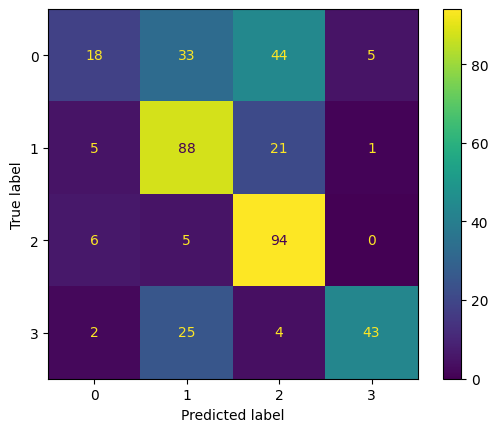

In [132]:
disp = cmd(cm(y_test, yhat_test))
disp.plot()

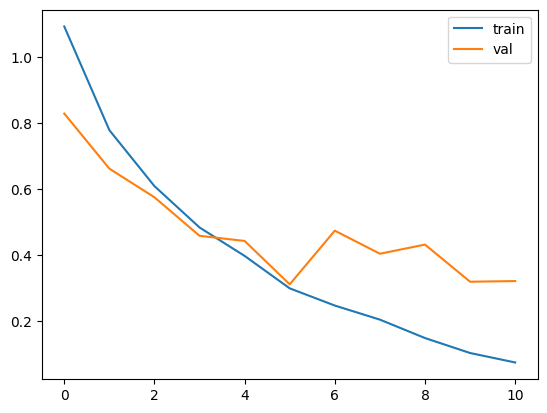

In [121]:
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='val')
plt.legend()